### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [2]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [3]:
# 2. Import keys.py
# use keys here 


auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [4]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [5]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=500, lang="en",tweet_mode='extended',result_type='recent').items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.full_text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        
        
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# take input from user
Topic = "Pakistan"
# Topic=["Pakistan"]
get_tweets(Topic , Count=500)

In [6]:
# Showing the data the Data
df.head(10)         

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-01-21,A.,False,KP continues to look like a province that is a...,0,0,Pakistan se Dur Dil se Majboor
1,2023-01-21,विजय,False,RT @ModiBharosa: Point Blank responses by @Sri...,0,75,
2,2023-01-21,sadiaiqbal,False,@IrshadBhatti336 Arshad bahi is at good place ...,0,0,
3,2023-01-21,Free Guy 🇮🇳,False,RT @total_woke_: Muslims are complicated. When...,0,140,Republic of Bharat
4,2023-01-21,پاک صلاح,False,RT @Sanwal_Behzad2: In Pakistan Only Youth Can...,0,8,Pakistan
5,2023-01-21,TLP چانڈیو,False,RT @_roha4567: Only one party will change the ...,0,21,
6,2023-01-21,m.abbas,False,"RT @MALHACHIMI: To the Muslims of #Pakistan, M...",0,192,Saudi Arabia
7,2023-01-21,Pawan Mehra,False,RT @JSFM_INTL_SPKMN: Foreign minister of Pakis...,0,9,
8,2023-01-21,urainab khan,False,RT @Shaheen95717925: Justice is sleeping in Pa...,0,14,
9,2023-01-21,saman,False,RT @PTIofficial: And finally Shehbaz Sharif’s ...,0,455,


In [7]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet



[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:


from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    # print analysis values
    if analysis.sentiment.polarity >=0 and analysis.sentiment.polarity <=0.3:
        some_positive = "some positive"
        return some_positive
    elif analysis.sentiment.polarity >=0.3 and analysis.sentiment.polarity <=0.6:
        positive = "positive"
        return positive
    elif analysis.sentiment.polarity >=0.6 and analysis.sentiment.polarity <=1:
        very_positive = "very positive"
        return very_positive
    elif analysis.sentiment.polarity >=-0.3 and analysis.sentiment.polarity <=0:
        some_negative = "some negative"
        return some_negative    
    elif analysis.sentiment.polarity >=-0.6 and analysis.sentiment.polarity <=-0.3:
        negative = "negative"
        return negative
    elif analysis.sentiment.polarity >=-1 and analysis.sentiment.polarity <=-0.6:
        very_negative = "very negative"
        return very_negative
    else:
        neutral = "neutral"
        return neutral


In [9]:

from wordcloud import WordCloud, STOPWORDS


def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    # don't want to prnt these words in WordCloud
    return text_new


prepCloud("Pakistan",Topic)



'Pakistan'

In [10]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

df.head(5)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-01-21,A.,False,KP continues to look like a province that is a...,0,0,Pakistan se Dur Dil se Majboor,continues look like province par rest pakistan...
1,2023-01-21,विजय,False,RT @ModiBharosa: Point Blank responses by @Sri...,0,75,,modibharosa point blank response srisri hinark...
2,2023-01-21,sadiaiqbal,False,@IrshadBhatti336 Arshad bahi is at good place ...,0,0,,arshad bahi good place duty forget establishme...
3,2023-01-21,Free Guy 🇮🇳,False,RT @total_woke_: Muslims are complicated. When...,0,140,Republic of Bharat,muslim complicated danger went pakistan danger
4,2023-01-21,پاک صلاح,False,RT @Sanwal_Behzad2: In Pakistan Only Youth Can...,0,8,Pakistan,pakistan youth change system amp challeng corr...


In [11]:


df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment"),index=False)   ## Save as Excel



In [12]:
# use naive bayes classifier for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

# 
# Split into training and testing data
# load data from sentiment.xlsx
x = df['clean_tweet']
y = df['Sentiment']
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [13]:
# Vectorize text reviews to numbers
vec = CountVectorizer()
x = vec.fit_transform(x)
x_test = vec.transform(x_test)


In [14]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [15]:
model.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ",model.score(x_test, y_test)*100,"%")


Accuracy of Naive Bayes Classifier is :  75.24752475247524 %


/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127472 (\N{REGIONAL INDICATOR SYMBOL LETTER K}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


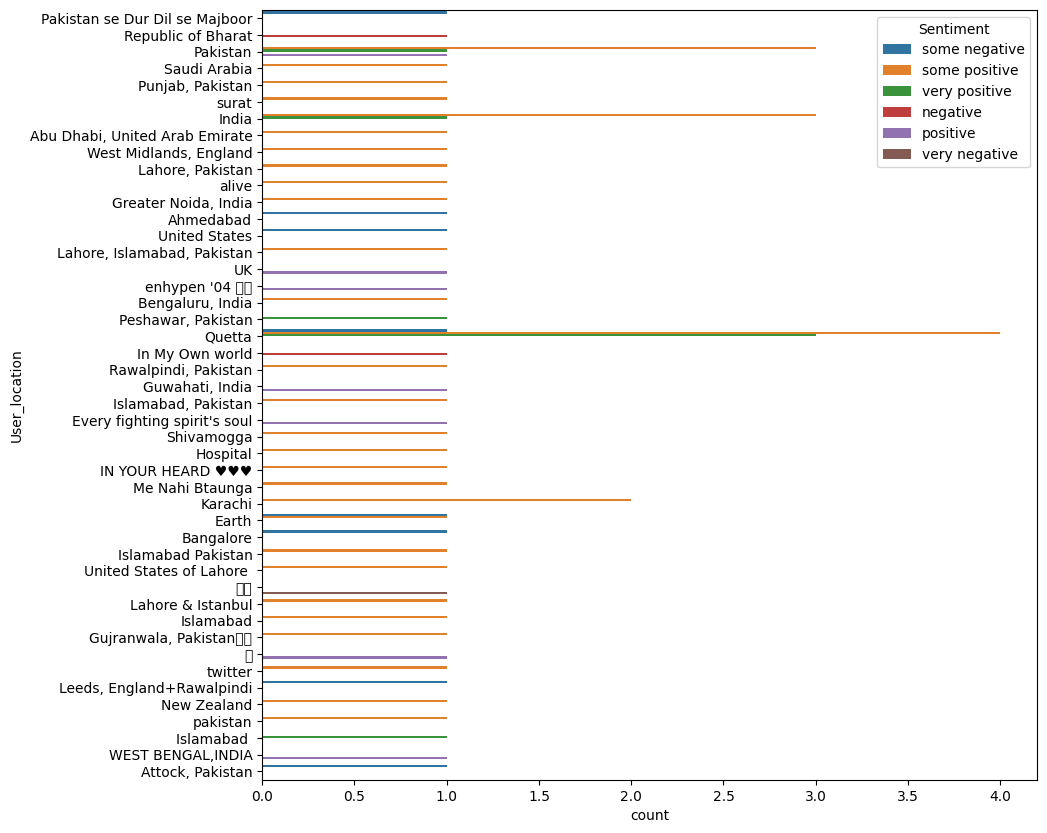

In [30]:
# plot user_location graph using seaborn on behalf of 100 tweets 
plt.figure(figsize=(10,10))
# print user location graph for first 100 tweets
data = pd.read_excel('Sentiment.xlsx')
data = data.head(100)
# User location with sentiment
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

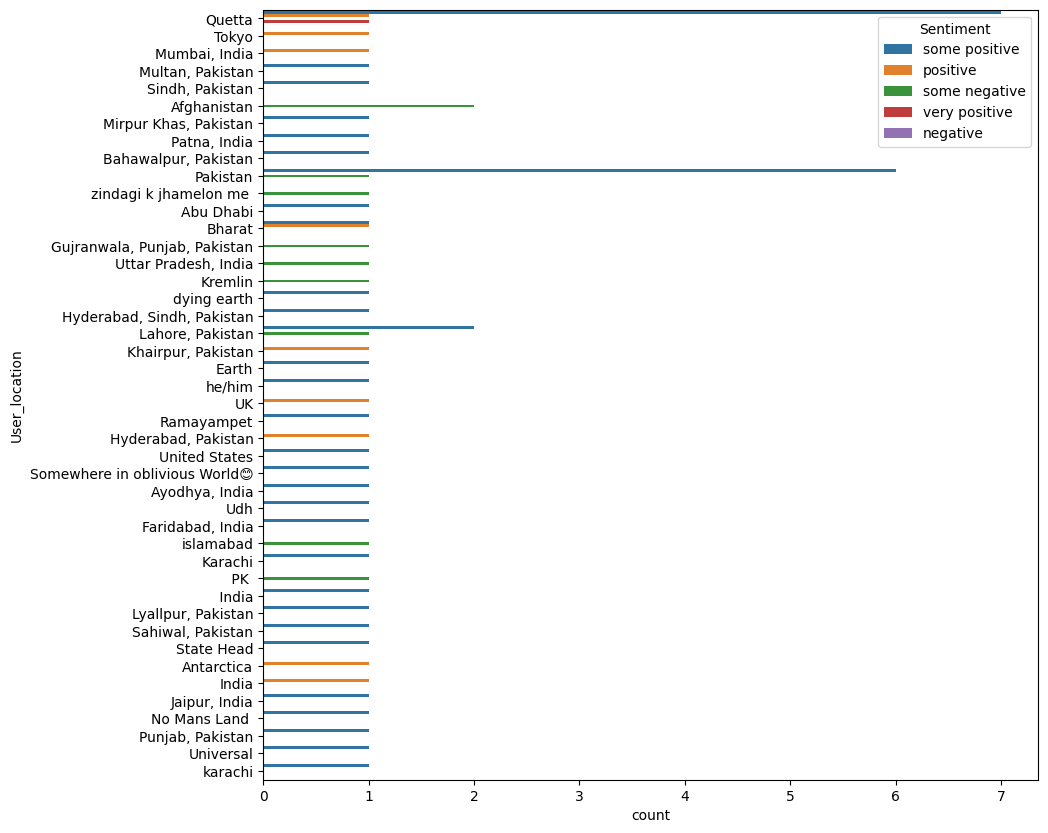

In [32]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[100:200]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/

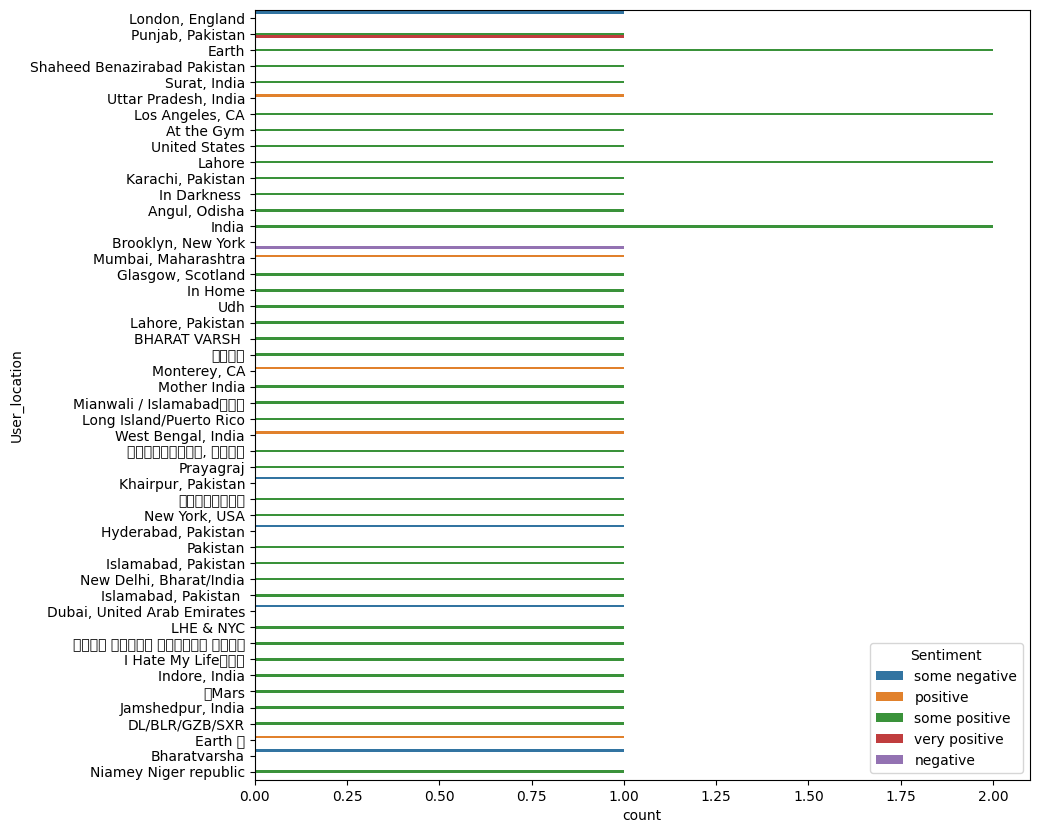

In [33]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[200:300]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

In [19]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[300:400]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bakar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


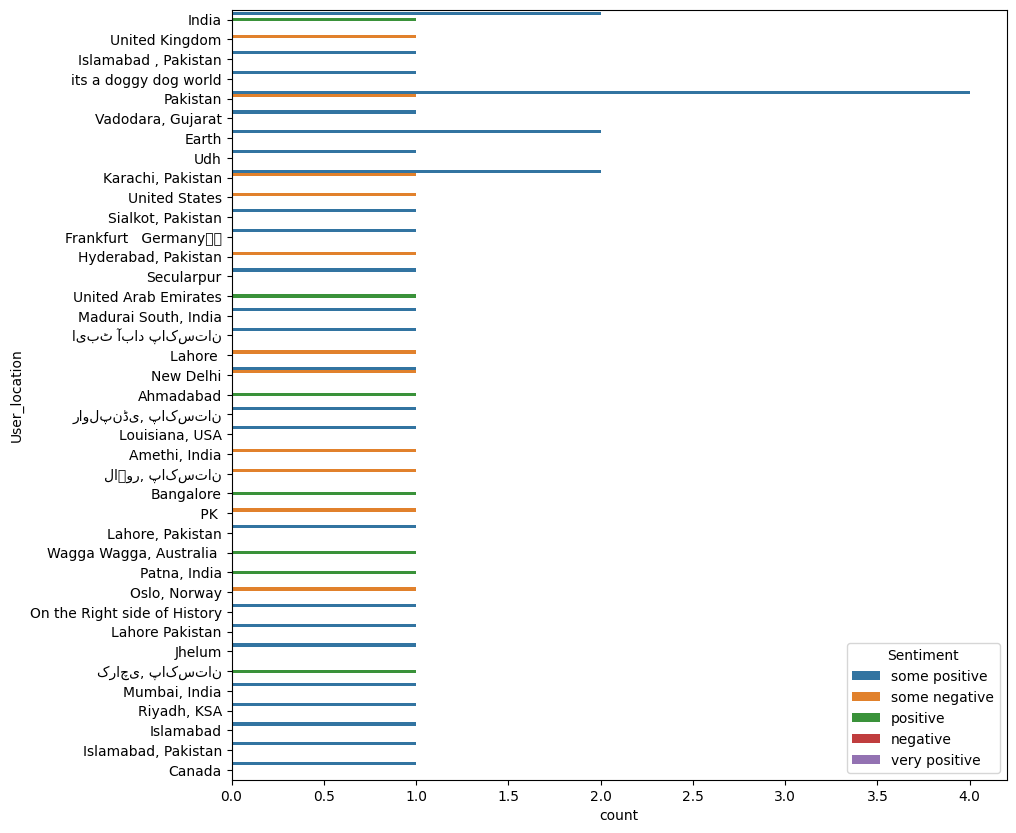

In [34]:
plt.figure(figsize=(10,10))
data = pd.read_excel('Sentiment.xlsx')
data = data[400:500]
sns.countplot(y='User_location',hue='Sentiment',data=data)
plt.show()

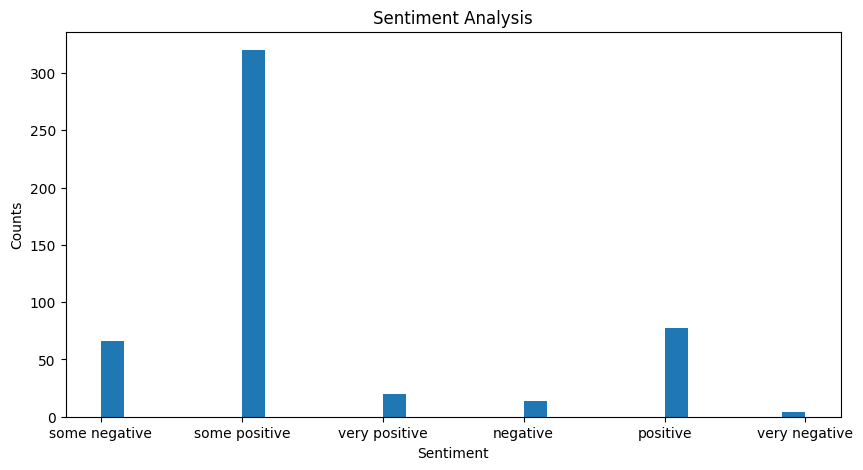

([<matplotlib.patches.Wedge at 0x7f946b6fce20>,
 [Text(-0.46435902062069245, 0.9971813776681709, 'some positive'),
  Text(-0.2361191317239328, -1.0743592302549163, 'positive'),
  Text(0.691984314772065, -0.8550776035597213, 'some negative'),
  Text(1.0328732206197002, -0.378381963268188, 'very positive'),
  Text(1.0895493378812517, -0.1512687684967593, 'negative'),
  Text(1.0996539920967419, -0.027587998580885315, 'very negative')],
 [Text(-0.25328673852037764, 0.5439171150917296, '63.9%'),
  Text(-0.1287922536675997, -0.5860141255935906, '15.4%'),
  Text(0.3774459898756718, -0.4664059655780297, '13.2%'),
  Text(0.563385393065291, -0.206390161782648, '4.0%'),
  Text(0.594299638844319, -0.0825102373618687, '2.8%'),
  Text(0.5998112684164045, -0.015047999225937442, '0.8%')])

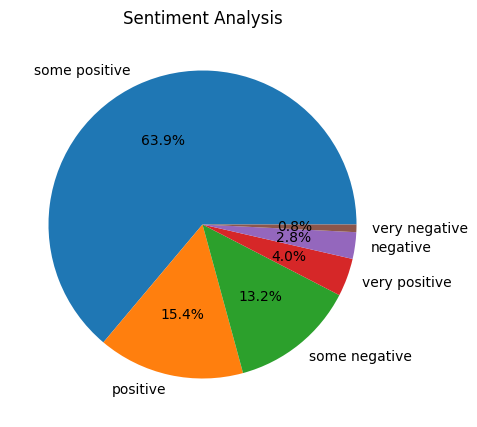

In [21]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# plot graph of sentiment analysis with matplotlib
plt.hist(df['Sentiment'], bins=30)
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')

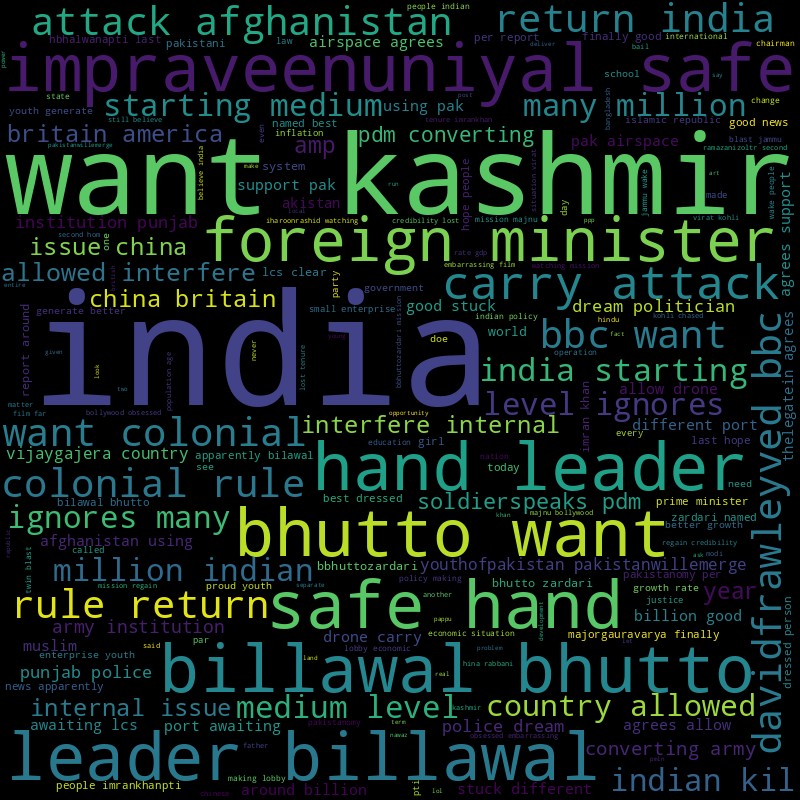

In [22]:
# plot word cloud for maximum occuring words
wordcloud = WordCloud(width = 800, height = 800)
wordcloud.generate(prepCloud(df['clean_tweet'].str.cat(sep=' '),Topic))
wordcloud.to_image()